In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
def datagen(d, points, m, M, w, sigma):
    """
    Parameters
    ----------
    d : int
        Dimension of each data sample
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    w : float array of dim d
        Vector of weights of the linear model
    sigma : float
        Standard deviation of the noise eps
    """
    X = np.zeros((points, d))
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    eps = np.random.normal(0, sigma, points)
    y = np.dot(X, w) + eps
    return X, y

In [12]:
d = 1
w = np.random.normal(0, 1, d)
sigma = 1
points = 100
m = -10
M = 10

X, y = datagen(d, points, m, M, w, sigma)

C:\Users\mutua\AppData\Local\Temp\ipykernel_1864\3577871649.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


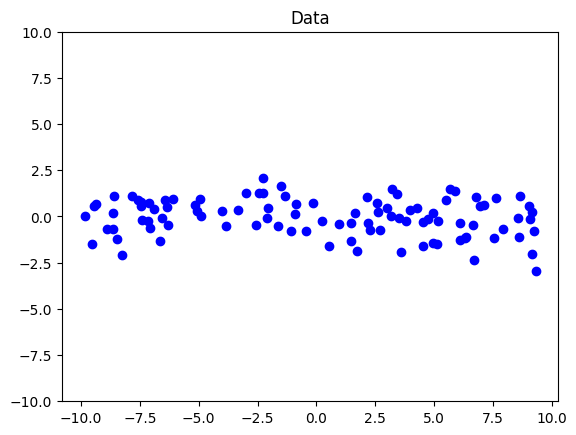

In [13]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data')
plt.ylim([m, M])

fig.show()

In [14]:
d = 1
w = np.random.normal(0, 1, d)
sigma = 0 #removal of noise
points = 100
m = -10
M = 10

X, y = datagen(d, points, m, M, w, sigma)

C:\Users\mutua\AppData\Local\Temp\ipykernel_1864\1517075810.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


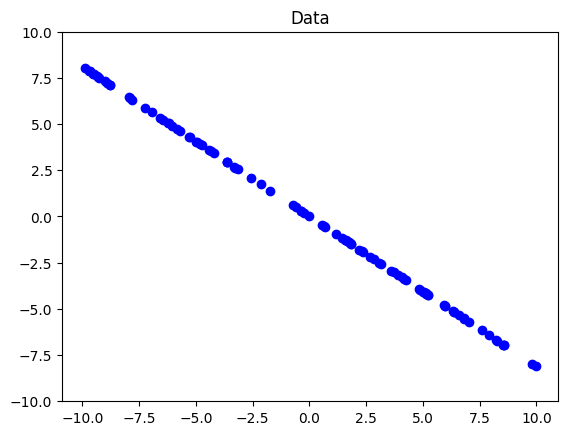

In [15]:
# plotting the generated dataset without noise
fig, ax = plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data')
plt.ylim([m, M])

fig.show()

In [16]:
def mixGauss(means, sigmas, n):
    """
    Parameters
    ----------
    means : matrix/list of float of dim n_classes x dim_data (d)
        Means of the Gaussian functions
    sigmas : array/list of float of dim n_classes
        Standard deviation of the Gaussian functions
    n : int
        Number of points for each class
    """
    means = np.array(means)
    sigmas = np.array(sigmas)

    d = np.shape(means)[1] # the means matrix is of n_classes x dim_data
    num_classes = sigmas.size # the number of variances is the number of classes

    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    # iterate over classes
    for idx, sigma in enumerate(sigmas):
        # generates n points around means[idx] with cov sigma[idx]
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)
        labels[idx * n:(idx + 1) * n] = idx

    if(num_classes == 2):
        labels[labels == 0] = -1

    return data, labels

In [17]:
# usage example
means = [[3,0],[0,6]]
sigmas = [0.9,0.9]
n = 100

X, labels = mixGauss(means, sigmas, n)

C:\Users\mutua\AppData\Local\Temp\ipykernel_1864\2307517422.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


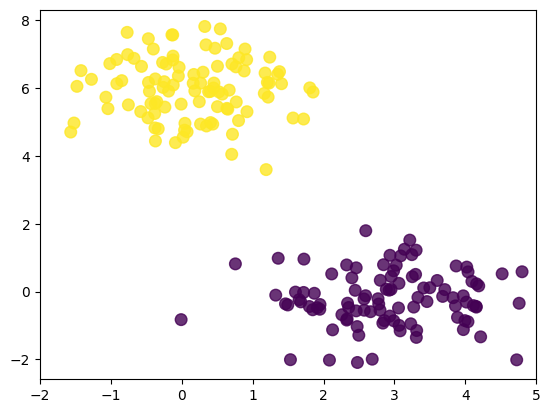

In [20]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
ax.set_xlim([-2,5])
fig.show()

In [21]:
def labelsnoise(perc, labels):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    labels: array of int of dim n_classes
        Array containing labels idxs
    """
    points = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(points * perc / 100)) # floor: nearest integer by defect
    idx_to_flip = np.random.choice(points, size=n_flips, replace=False) # replace is false since the same index cannot be chosen twice
    noisylabels[idx_to_flip] = -noisylabels[idx_to_flip] # for binary this turns -1 into 1 and viceversa
    return noisylabels

In [26]:
# usage example
noisylabels = labelsnoise(5, labels)


C:\Users\mutua\AppData\Local\Temp\ipykernel_1864\1184726251.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


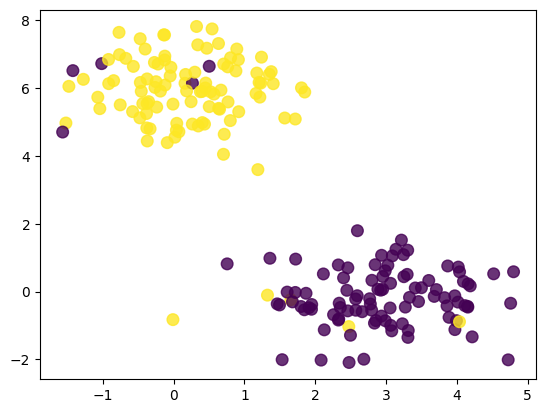

In [27]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=noisylabels, alpha=0.8)
fig.show()

In [28]:
def binary(a, b, points, m, M, d):
    """
    Parameters
    ----------
    a : float
        Angular coefficient (slope) of the separating line
    b : float
        Intercept of the separating line
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    d : int
        Dimension of each data sample
    """
    X = np.zeros((points,d))
    labels = np.zeros(points)

    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)

    labels[X[:,1]-a*X[:,0]-b>=0] = 1
    labels[X[:,1]-a*X[:,0]-b<0] = -1
    return X, labels

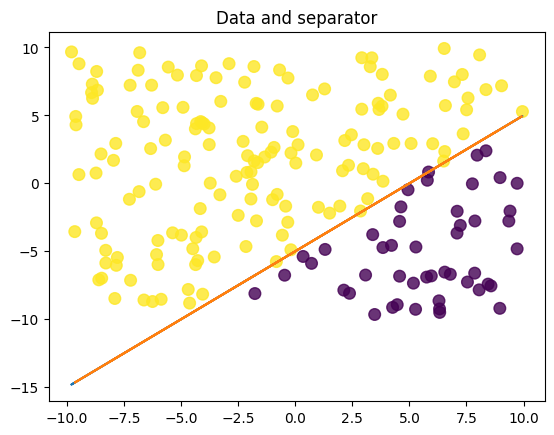

In [34]:
# usage example
a=1
b=-5
d=2
points=200
m=-10
M=10

X,labels=binary(a,b,points,m,M,d)

# plotting the generated dataset
fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(X,a*X+b)
ax.set_title('Data and separator')
plt.show()

In [33]:
def flipLabels(perc, Y):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

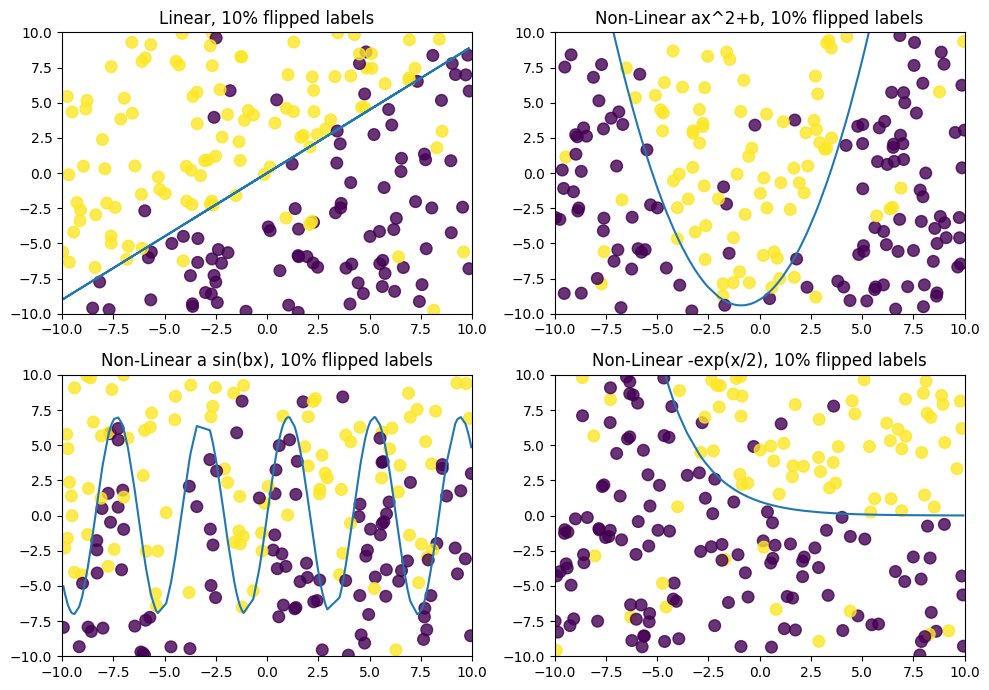

In [35]:
n = 200 # number of points per class
D = 2 # dimension of the points

fig = plt.figure(figsize=(10,7))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)


# linear case
m = 0.9
q = 0

# bounds (assume they are the same for all dimensions)
low_D = -10
high_D = 10

X = np.zeros((n, D))
Y = np.zeros(n)

# sampling of the X
for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

# assigning the labels depending on the position of the sample with respect to the linear separator
Y[X[:,1] - (X[:,0] * m + q) > 0] = 1
Y[Y==0] = -1

# add some noise
Yn = flipLabels(10, Y)

# plot the samples and the separator
ax0.set_title("Linear, 10% flipped labels")
ax0.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax0.plot(X[:,0], X[:,0] * m + q)
ax0.set_xlim((low_D, high_D))
ax0.set_ylim((low_D, high_D))


# non-linear separators case 1

a = 0.5
b = 0.9
c = -9

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

Y[X[:,1] - (X[:,0]**2 * a + X[:,0]*b + c) > 0] = 1
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax1.set_title("Non-Linear ax^2+b, 10% flipped labels")
ax1.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax1.plot(np.sort(X[:,0]), np.sort(X[:,0])**2 * a + np.sort(X[:,0])*b + c)
ax1.set_xlim((low_D, high_D))
ax1.set_ylim((low_D, high_D))

# non-linear case 2

alpha = 7
beta = 1.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

Y[X[:,1] - alpha*np.sin(beta*X[:,0]) > 0] = 1
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax2.set_title("Non-Linear a sin(bx), 10% flipped labels")
ax2.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax2.plot(np.sort(X[:,0]), alpha*np.sin(beta*np.sort(X[:,0])))
ax2.set_xlim((low_D, high_D))
ax2.set_ylim((low_D, high_D))

# non-linear case 3

alpha = 7
beta = 0.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

Y[X[:,1] - np.exp(-X[:,0]/2) > 0] = 1
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax3.set_title("Non-Linear -exp(x/2), 10% flipped labels")
ax3.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax3.plot(np.sort(X[:,0]), np.exp(-np.sort(X[:,0]/2)))
ax3.set_xlim((low_D, high_D))
ax3.set_ylim((low_D, high_D))

plt.tight_layout()

In [36]:
# usage of the np.mod() function
x = np.array([0, 2, 2, 1, 0, 3]) # array of 4 labels
y = np.mod(x, 2) # transform the labels so that they are now binary
print(y)

[0 0 0 1 0 1]


In [38]:
# from {0, 1} labels to {-1, 1} labels
z = 2 * y - 1
print(z)

[-1 -1 -1  1 -1  1]


In [39]:
# generate two datasets: binary (2 classes) and non binary (4 classes)
# classification with more than two gaussians
mu = [[0,0], [0,1], [1,1], [1,0]] # 4 classes, 2-dim points
sigma = [0.2, 0.2, 0.2, 0.2] # 4 classes
X, y = mixGauss(mu, sigma, 200)

# transform y so that it represents a binary classification problem for the same dataset
y_bin = 2 * np.mod(y, 2) - 1

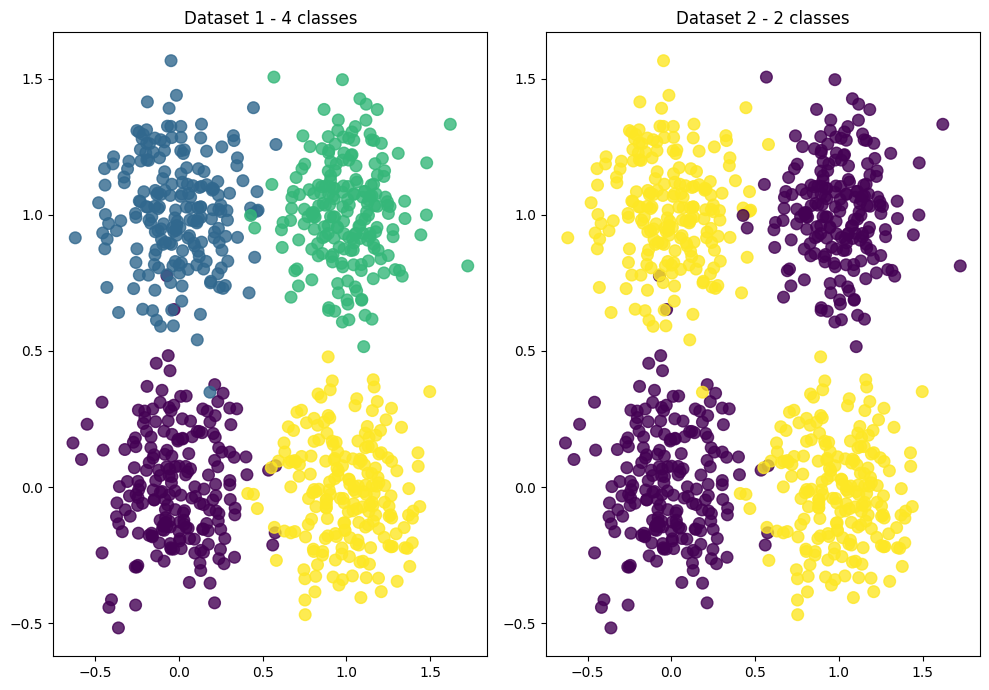

In [40]:
# plot the two generated datasets
fig = plt.figure(figsize=(10,7))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:, 0], X[:, 1], s=70, c=y, alpha=0.8)

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:, 0], X[:, 1], s=70, c=y_bin, alpha=0.8)

plt.tight_layout()

In [41]:
# we can use the np.mod() function again
n_classes = 4
y = np.random.choice(n_classes, size=10, replace=True) # generate random labels array
print(y)
y_flip = np.mod(y + 1, n_classes) # add 1 so that all labels actually change
print(y_flip)

[1 0 2 1 2 0 3 2 0 2]
[2 1 3 2 3 1 0 3 1 3]


In [62]:
def flipLabels_multipleGaussian(perc, Y):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    # again we can use np.mod()
    n_classes = len(np.unique(Y, return_counts=False))
    Y_noisy[idx_to_flip] = np.mod(Y_noisy[idx_to_flip] + 1, n_classes)
    if n_classes == 2:
      Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

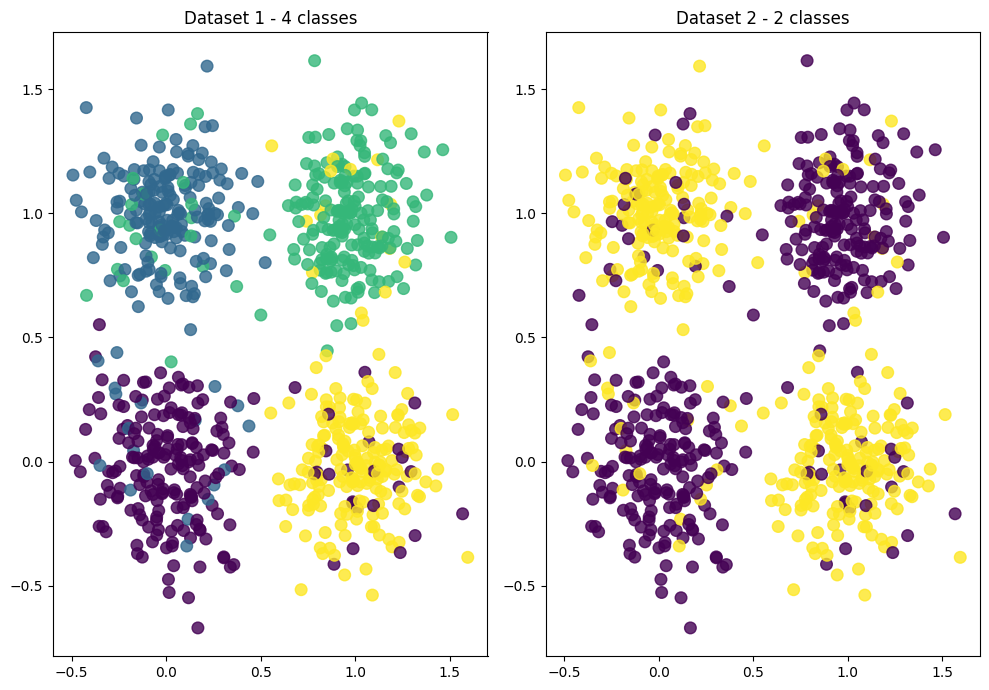

In [66]:
# example of usage
X, y = mixGauss(mu, sigma, 200)
p = 10 # flip 20% of labels
y_noisy = flipLabels_multipleGaussian(p, y)
y_bin_noisy = 2 * np.mod(y_noisy, 2) - 1

# plot the two generated datasets
fig = plt.figure(figsize=(10,7))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:, 0], X[:, 1], s=70, c=y_noisy, alpha=0.8)

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:, 0], X[:, 1], s=70, c=y_bin_noisy, alpha=0.8)

plt.tight_layout()